In [5]:
import pandas as pd
import numpy as np
import os
import qgrid
import nltk
from nltk import word_tokenize
import datetime
from matplotlib import pyplot as plt

In [6]:
def tokenize_text(text):
    words = word_tokenize(text)
    return words

In [7]:
file_path = '../Merged_Resources'
review_file = 'airbnb_rvw_wSeasons.csv'

In [8]:
#Imported Listing.csv listing descriptions w/ Review.csv file 
full_path = os.path.join(file_path, review_file)
review_df = pd.read_csv(full_path, index_col=False)

In [9]:
#Generate primative tokeniztion for listing Description to compare against review comment length
description_text = [tokenize_text(str(description)) for description in review_df.Description]
description_length = [len(description) for description in description_text]
review_df['description_length'] = description_length

In [10]:
#Capture basic descriptive stats for Description series
review_df['description_length'].describe()

count    177340.000000
mean        184.322550
std          36.092987
min           1.000000
25%         184.000000
50%         194.000000
75%         202.000000
max         266.000000
Name: description_length, dtype: float64

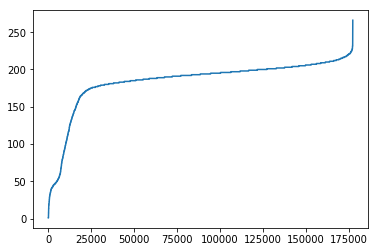

In [11]:
#plot s-curve for quick look at sorted linear distribution of tokens
desc_length = sorted(review_df['description_length'].values)
x_axis = np.arange(len(desc_length))
plt.plot(x_axis, desc_length)

In [28]:
#Capture basic Review Comment stats for Description series
review_df['comment_length'].describe()

count    177340.000000
mean         70.272020
std          54.106114
min           1.000000
25%          35.000000
50%          58.000000
75%          90.000000
max         652.000000
Name: comment_length, dtype: float64

Text(0.5, 1.0, 'Description Length S-Curve')

Text(0.5, 0, 'Records')

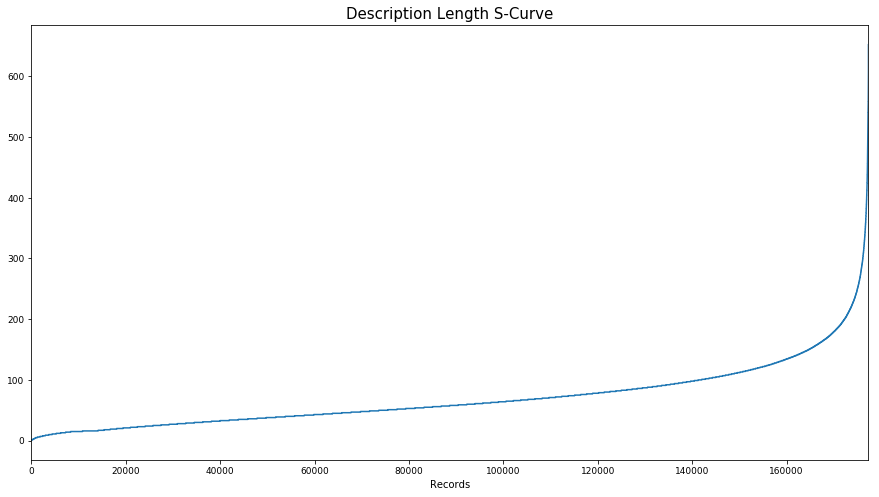

In [30]:
#Generate primative tokeniztion for review comment length
comm_length = sorted(review_df['comment_length'].values)
comm_length = pd.Series(comm_length, name='Review Comment Length')
x_axis = np.arange(len(comm_length))
comm_length.plot(kind='line', figsize=(15,8))
plt.title('Description Length S-Curve', fontsize = 15)
plt.xlabel("Records", fontsize = 10)

plt.tick_params(labelsize=9)
plt.show()

Text(0.5, 1.0, 'Description Length Histogram')

Text(0.5, 0, 'Token Count')

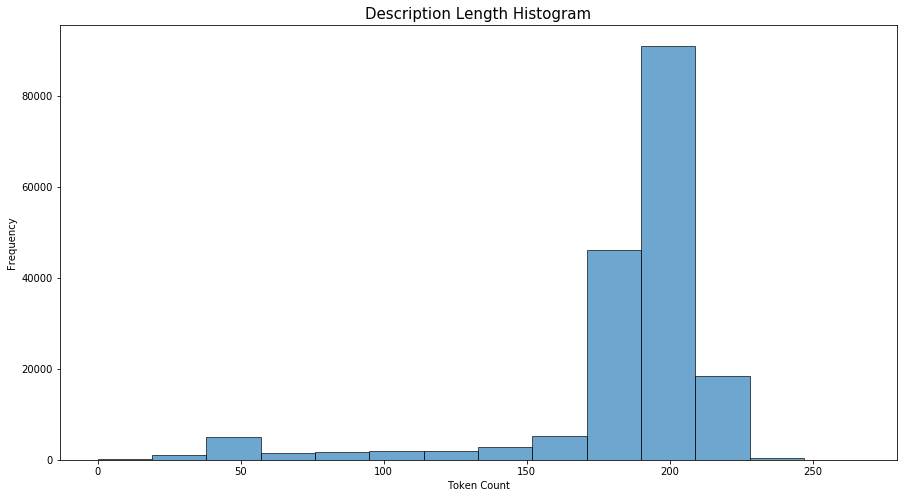

In [31]:
#create bins for description token count
y_val = review_df['description_length']
y_bins = np.linspace(0,max(desc_length),num=15)
plt.title('Description Length Histogram', fontsize = 15)
plt.xlabel("Token Count", fontsize = 10)

y_val.plot.hist(y_bins, linewidth=1.0, edgecolor='k', alpha=0.65, figsize=(15,8))

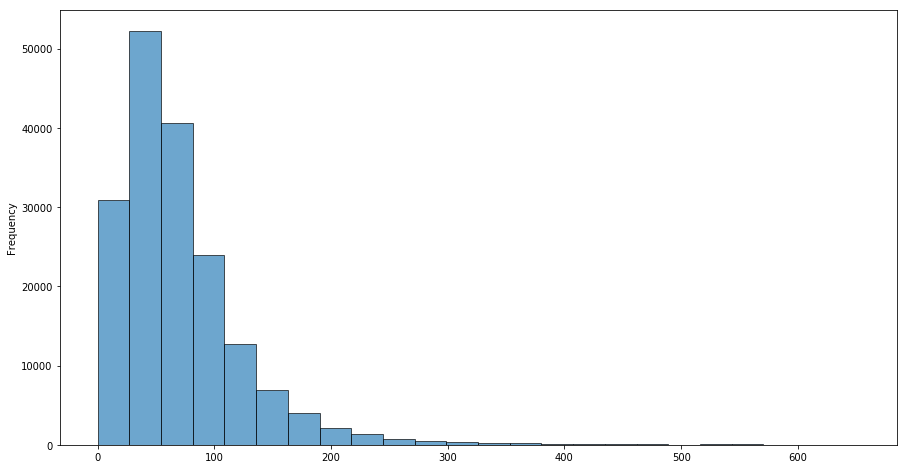

In [46]:
x_val = review_df['comment_length']
x_bins = np.linspace(0,max(x_val),num=25)
x_val.plot.hist(x_bins, linewidth=1.0, edgecolor='k', alpha=0.65, figsize=(15,8))

In [20]:
review_group = review_df.loc[:,['listing_id', 'comment_length', 'description_length']].groupby('listing_id').median()

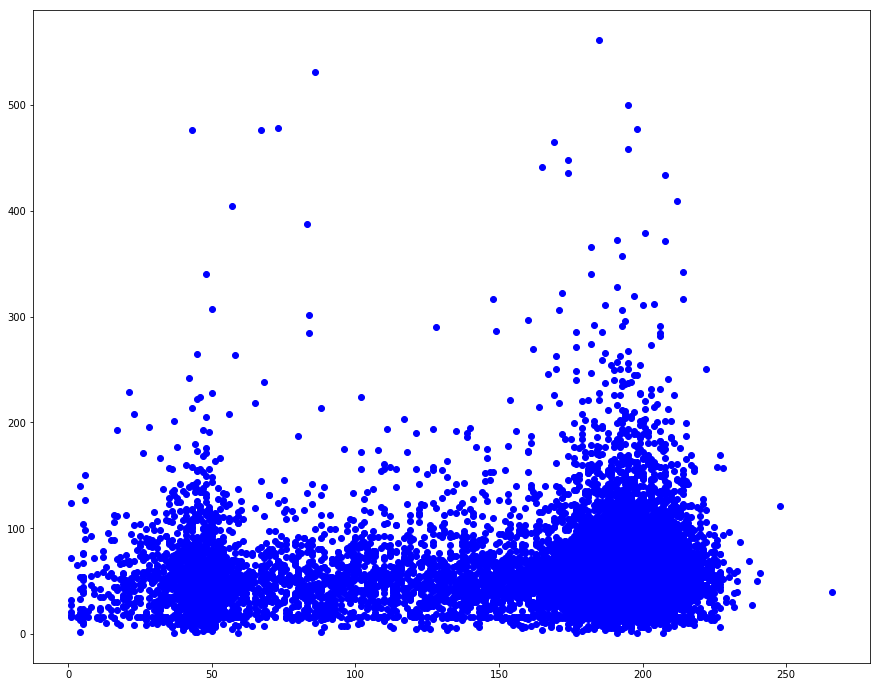

In [50]:
# review_qg = qgrid.show_grid(review_df, show_toolbar=True)
y_val = review_group['comment_length'].values
x_val = review_group['description_length'].values
x_axis = np.arange(len(x_val))

fig, ax = plt.subplots()
ax.plot(x_val,y_val,'bo', label='values')
ax.figure.set_figwidth(15)
ax.figure.set_figheight(12)